In [53]:
import pandas as pd
from scipy import stats
import numpy as np

df = pd.read_csv("Life_Expectancy_Data.csv")

In [54]:
df.head(5)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [55]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [56]:
print("Number of Missing Values per column:")
print(df.isnull().sum())

Number of Missing Values per column:
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [57]:
for column in df.columns:
    if df[column].isnull().sum()/df[column].count()>0.3:
        df.drop(column, inplace=True)

In [58]:
for column in df.columns:
        if df[column].dtype != "object":
            df[column] = df[column].fillna(df[column].median())
        else:
            df[column] = df[column].fillna(df[column].mode())

print(df.isnull().sum())

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [59]:
print("Data Size:",df.size)

Data Size: 61698


In [60]:
print("Number of Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

Number of Duplicate Rows: 0


In [61]:
print("Data Size:",df.size)

Data Size: 61698


In [62]:
num_cols = df.select_dtypes(exclude='object').columns

iqr_outlier_cols = []
zscore_outlier_cols = []

# ----- IQR Method -----
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers_iqr = df[(df[col] < lower) | (df[col] > upper)]
    if len(outliers_iqr) > 0:
        iqr_outlier_cols.append(col)

# ----- Z-Score Method -----
for col in num_cols:
    z = np.abs(stats.zscore(df[col]))
    if (z > 3).any():
        zscore_outlier_cols.append(col)

# ----- Print results -----
print("Columns with outliers using IQR method:")
print(iqr_outlier_cols)

print("\nColumns with outliers using Z-score method:")
print(zscore_outlier_cols)


Columns with outliers using IQR method:
['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

Columns with outliers using Z-score method:
['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [64]:
num_cols = df.select_dtypes(exclude='object').columns

df_iqr = df.copy()

for col in num_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_iqr = df_iqr[(df_iqr[col] >= lower) & (df_iqr[col] <= upper)]

print("Shape after removing outliers using IQR method:", df_iqr.shape)

df_z = df.copy()

z_scores = np.abs(stats.zscore(df_z[num_cols], nan_policy='omit'))

df_z = df_z[(z_scores < 3).all(axis=1)]

print("Shape after removing outliers using Z-score method:", df_z.shape)

print("Looking at the results, the IQR method removes more outliers, so it would be preferrable to use as it removes chances of errors. IQR is more robust for skewed/non-normal data, as it depends on percentiles.")

Shape after removing outliers using IQR method: (626, 21)
Shape after removing outliers using Z-score method: (2177, 21)
Looking at the results, the IQR method removes more outliers, so it would be preferrable to use as it removes chances of errors. IQR is more robust for skewed/non-normal data, as it depends on percentiles.


In [66]:
print("Categorical Columns:", df.select_dtypes(include=['object']).columns)

df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

df_encoded.to_csv("cleaned.csv", index=False)

Categorical Columns: Index(['Status'], dtype='object')
Data Saved


# Q2

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")

# Step b: Display basic information
print("Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe())

Shape: (508, 9)

Column Names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      183              0              0        0  28.4   
1            5      162            104              0        0  37.7   
2            2      197             70             99        0  34.7   
3           13      158            114              0        0  42.3   
4            0      162             76             56      100  53.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.212   36        1  
1                     0.151   52        1  
2                     0.575   62        1  
3                     0.257   44        1  
4                     0.759   25        1  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 9 columns):
 #   Column         

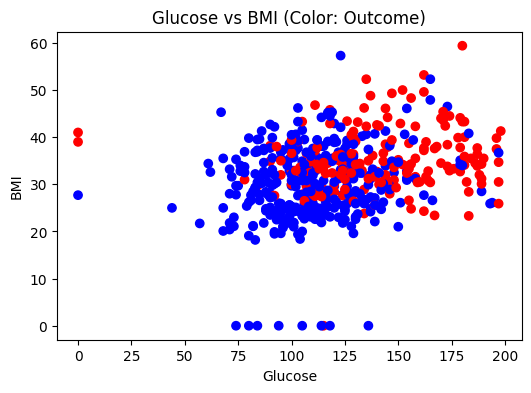

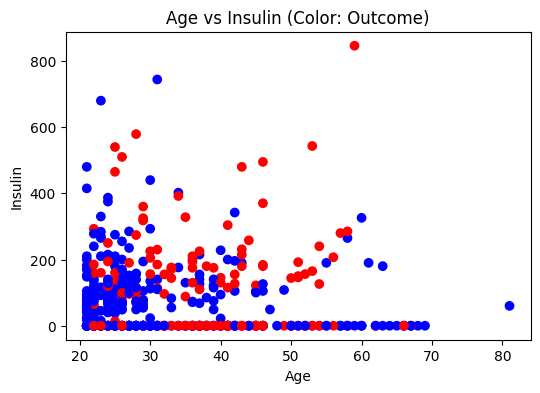

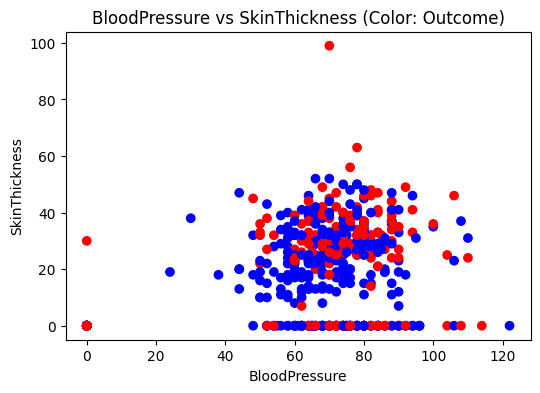

In [68]:
colors = {0: 'blue', 1: 'red'}

plt.figure(figsize=(6,4))
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'].map(colors))
plt.title("Glucose vs BMI (Color: Outcome)")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['Insulin'], c=df['Outcome'].map(colors))
plt.title("Age vs Insulin (Color: Outcome)")
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['BloodPressure'], df['SkinThickness'], c=df['Outcome'].map(colors))
plt.title("BloodPressure vs SkinThickness (Color: Outcome)")
plt.xlabel("BloodPressure")
plt.ylabel("SkinThickness")
plt.show()

/tmp/ipython-input-3858437339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
/tmp/ipython-input-3858437339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
/tmp/ipython-input-3858437339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
/tmp/ipython-input-3858437339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

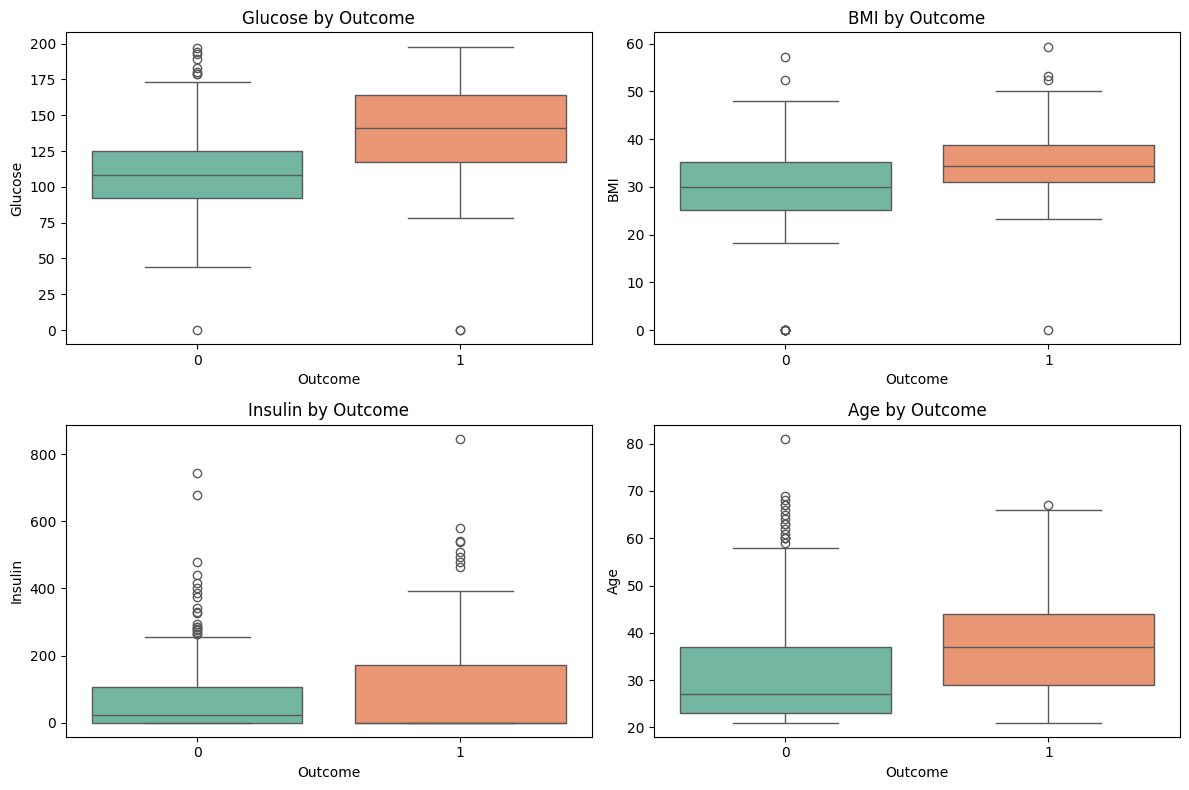

In [69]:
features = ['Glucose', 'BMI', 'Insulin', 'Age']

plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
    plt.title(f"{col} by Outcome")
plt.tight_layout()
plt.show()


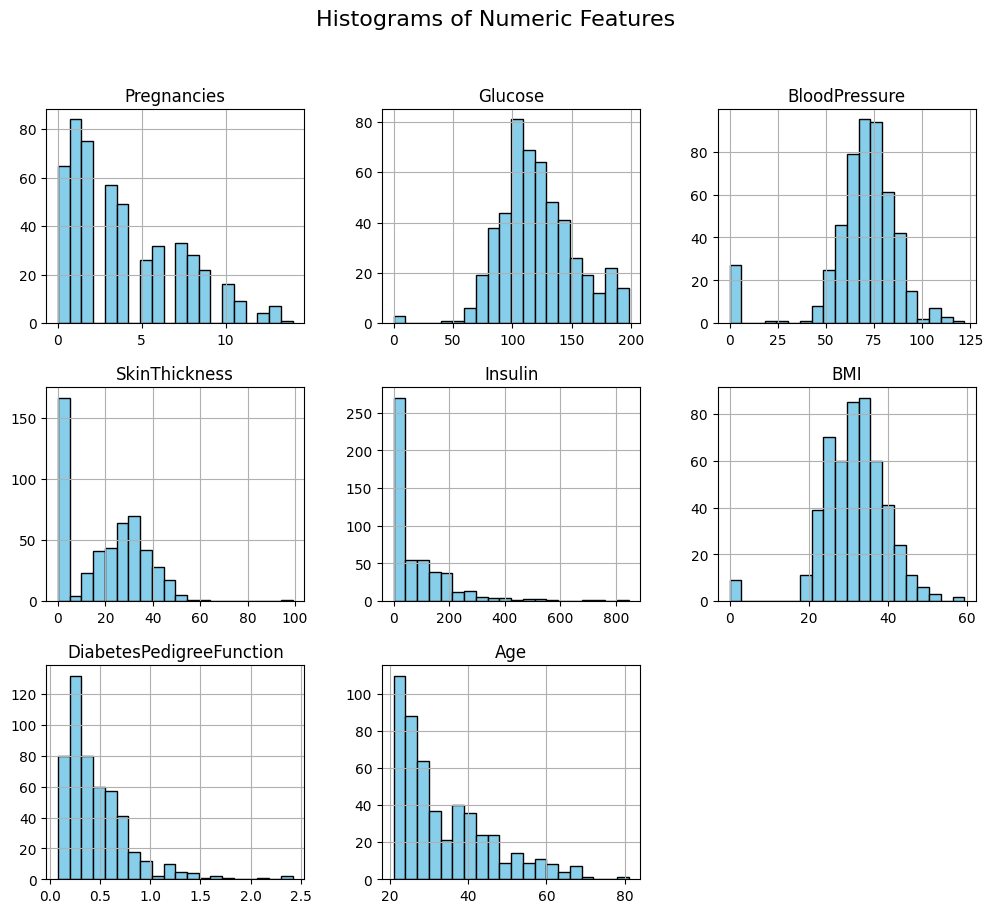

In [70]:
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

df[num_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


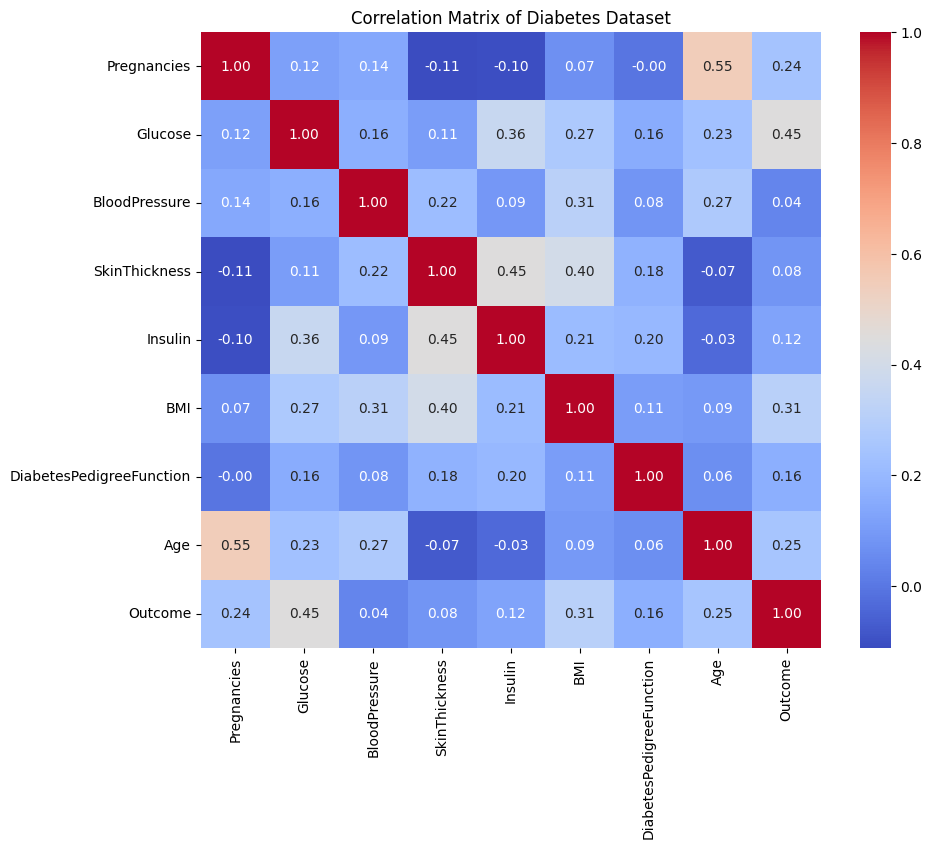

In [71]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()


In [ ]:
#Analysis:

# The data set has 508 rows and 9 columns
# No clear relation bw BMI vs Glucose or SkinThickness vs Blood Pressure
# Most people between 20-30 have insulin levels from 0-200

# Glucose levels in diabetic people is relatively higher than non-diabetic
# The median BMI in diabetic peeps is relatively higher, meaning that obesity may be a factor contributing to diabetics
# Insulin data is heavily skewed with extreme outliers, this data may need some data cleaning
# The average age of people with diabetics is relatively higher.

# Preganancies chart is heavily rightly skewed
# Glucose chart is moderatly leftly skewed
# BloodPressure chart is almost symmetrical with a few outliers
# Skin Thickness chart is heavily rightly skewed (most have 0 values, so it could mean missing values)
# Insulin chart is heavily rightly skewed (most have 0 values, so it could mean missing values)
# BMI chart is symmetrical
# DiabetesPedigreeFunction chart is heavily rightly skewed
# Age chart is heavily rightly skewed (most lie bw 20-40 years)

# Glucose has the strongest positive correlation with Outcome (0.45), meaning higher glucose levels increase diabetes risk.
# BMI and Age also show moderate positive correlation with Outcome (0.31 and 0.25 respectively).
# Pregnancies show a slight positive correlation with Outcome (0.22), indicating that more pregnancies may slightly raise diabetes likelihood.
# Insulin, BloodPressure, and SkinThickness have weak correlations with Outcome, implying lesser direct impact.
# Insulin and SkinThickness are moderately correlated with each other (0.45), both linked to body fat and metabolism.
# Age and Pregnancies are fairly correlated (0.55), as older individuals tend to have more pregnancies.
# Overall, Glucose, BMI, and Age appear as the most influential features for predicting diabetes.
